In [1]:
import sys
import numpy as np
import math
from loguru import logger
import config, dataset, main, utils, bins, convert
logger.remove(handler_id=None)
sys.path.append("src/")

In [2]:
def calculate(flip_ratio):
    con=convert.convert(flip_ratio)
    product_dataset = dataset.ProductDataset(
    #"../data/products.pkl",
    "../data",
    con[3],
    1,
    con[1],
    1,
    con[0],
    1,
    con[2],
    1,
    1000000,
    force_overload=2,
    )

    order = product_dataset.get_order(con[3]+1)
    bin_pool = main.main(
        order,
        procedure="mr",
    )
    maxn=0
    for i in bin_pool.get_original_bin_pool():
        if i.volume_ratio()>maxn:
            maxn=i.volume_ratio()
            id=i
    return id, maxn

In [3]:
def SA():
    T=1000 #initiate temperature
    Tmin=20 #minimum value of terperature
    x=np.random.uniform(low=0,high=1)#initiate x
    k=5 #times of internal circulation
    t=0#time

    answer,maxn=calculate(0)
    ori_ans,ori_maxn=answer,maxn
    print("original ratio (without SA) is ", ori_maxn)
    while T>=Tmin:
        for i in range(k):
            #calculate y
            id,ratio=calculate(x)
            if ratio > maxn:
                print(t,x,ratio)
                maxn=ratio
                answer=id
            #generate a new x in the neighboorhood of x by transform function
            xNew=x+np.random.uniform(low=-0.055,high=0.055)*T/100
            if (0<=xNew and xNew<=1):
                id_new,ratio_new=calculate(xNew)

                if ratio_new > maxn:
                    print(t,x,ratio)
                    maxn=ratio_new
                    answer=id_new

                if ratio_new>ratio:
                    x=xNew
                    id=id_new
                else:
                    #metropolis principle
                    p=math.exp(-(ratio_new-ratio)/T*100)
                    r=np.random.uniform(low=0,high=1)
                    if r<p:
                        x=xNew
        t+=1

        T=1000/(1+t)
    #id.plot()
    answer.plot()
    print(ori_maxn,ratio,maxn)
    return ori_ans,ori_maxn,answer,maxn

**************************
case:  0
original ratio (without SA) is  0.6589847262943168
0 0.9092573546386882 0.6791674338193703
0 0.5999121070041062 0.6736818211728829
0 0.8618562389148439 0.7045306653922515
1 0.7108586003896086 0.6817570311622413
5 0.43267243225197644 0.6452012355091225
13 0.36215126988091273 0.6031471982697023
Bin(LayerPool(layers=[Layer(height=25, ids=[4, 9, 14, 20, 21, 22, 29, 30, 31, 32, 34, 35, 37, 45, 46, 48, 53, 56, 58, 60]), Layer(height=30, ids=[0, 1, 10, 13, 15, 17, 18, 23, 25, 26, 112]), Layer(height=55, ids=[2, 3, 5, 6, 7, 8, 11, 12, 16, 19, 24, 27]), Layer(height=55, ids=[38, 41, 43, 49, 50, 51, 52, 55, 57, 59, 61, 64]), Layer(height=55, ids=[65, 68, 71, 72, 73, 74, 79, 83, 84, 86, 101, 103])])) 0.6508011732949768 0.7307513355103853
**************************
**************************
case:  1
original ratio (without SA) is  0.664420753735009
0 0.128440716329146 0.6254148772899093
5 0.36040127891473794 0.7224593730329595
6 0.5401122046698229 0.72710748756

D:\books\code\binpacking\3d-bpp-main\src\utils.py:290: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()


Bin(LayerPool(layers=[Layer(height=69, ids=[9, 17, 22, 24, 28, 34, 41, 53, 60, 63, 72, 78, 99, 101, 104]), Layer(height=55, ids=[6, 8, 29, 30, 33, 35, 47, 51, 62, 76, 82, 86, 106]), Layer(height=60, ids=[3, 27, 45, 49, 59, 69, 81, 92, 94])])) 0.4022038164656117 0.6732521048786924
**************************
**************************
case:  21
original ratio (without SA) is  0.523311161789348
0 0.5401020696963131 0.5415776271019707
0 0.5401020696963131 0.5415776271019707
0 0.55436429086687 0.5290070462837351
1 0.1444596019758142 0.6494211625138503
4 0.5865334419598676 0.5163091125776929
14 0.967017002519238 0.6037889810506082
26 0.931470080832115 0.6057178854369049
Bin(LayerPool(layers=[Layer(height=30, ids=[28, 32, 33, 35, 49, 50, 54, 56, 59, 69, 76, 91, 114]), Layer(height=48, ids=[14, 18, 21, 26, 37, 40, 41, 84, 92, 108, 112]), Layer(height=25, ids=[4, 22, 29, 31, 36, 38, 44, 46, 47, 55, 68, 72, 74, 78, 80, 86, 93, 95, 96, 98, 99, 109, 110, 113, 117, 120, 124]), Layer(height=46, ids=

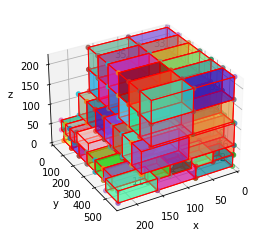

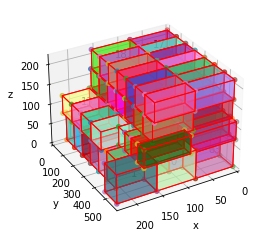

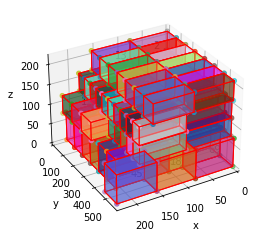

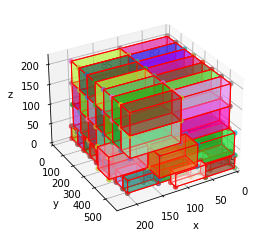

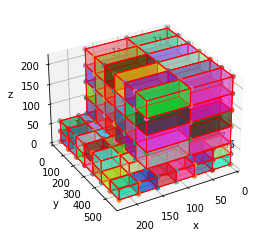

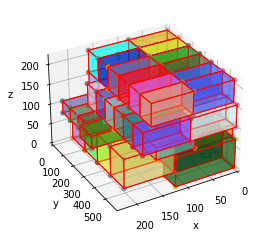

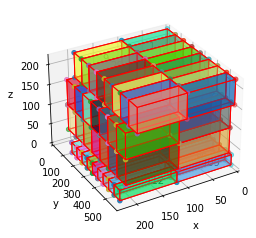

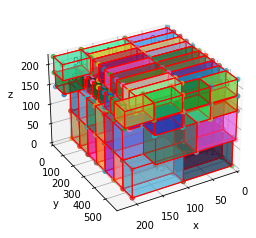

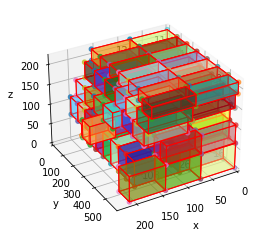

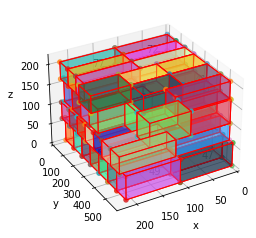

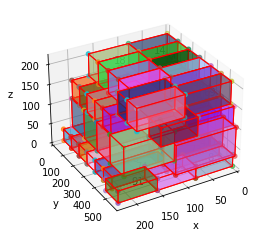

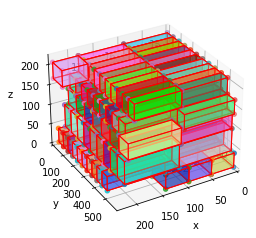

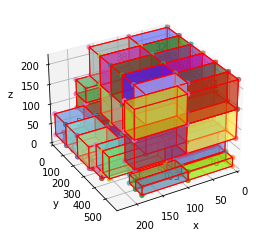

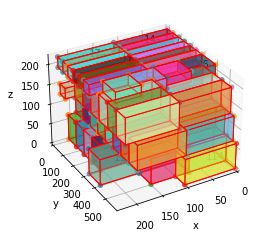

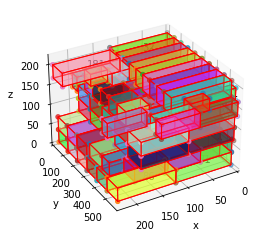

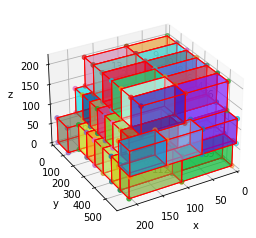

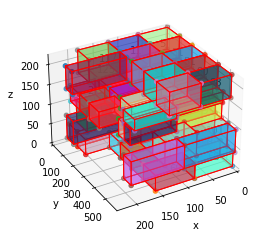

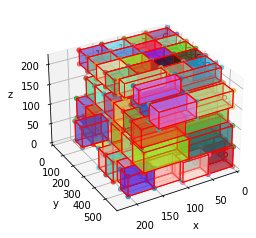

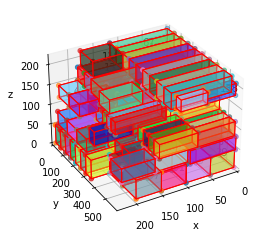

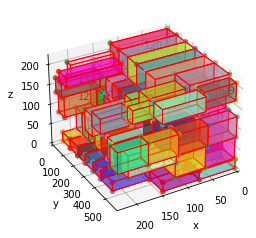

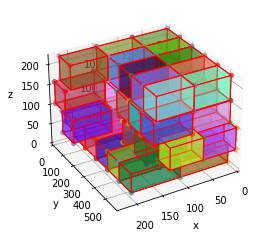

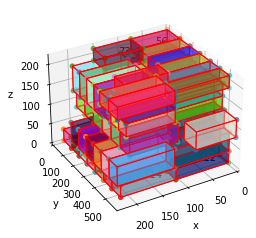

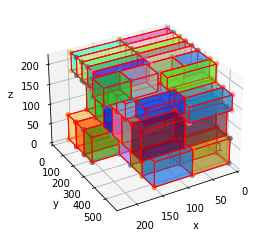

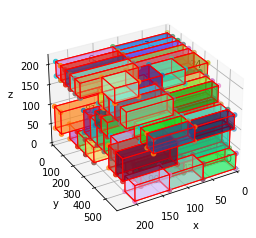

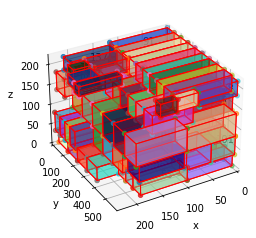

In [4]:
index = 0
while index < 50:
    print("**************************")
    print("case: ", int(index/2))
    convert.pre_convert(index)
    ori_ans,ori_maxn,answer,maxn=SA()
    answer.to_dataframe().to_csv("../result/case"+str(int(index/2))+".csv")
    index += 2
    print("**************************")